In [1]:
import dionysus as d
import numpy as np 
from scipy.spatial.distance import pdist ,squareform


In [2]:
#simplices
s=d.Simplex([1,2,3,0,4,5])
print("dimension of simplex:",s.dimension())

for v in s :
    print (v)
for sb in s.boundary():
    print(sb)
s.data=5
print(s)
simplex9 = d.Simplex([0,1,2,])
sphere8  = d.closure([simplex9],2)
print(len(sphere8))

dimension of simplex: 5
0
1
2
3
4
5
<1,2,3,4,5> 0
<0,2,3,4,5> 0
<0,1,3,4,5> 0
<0,1,2,4,5> 0
<0,1,2,3,5> 0
<0,1,2,3,4> 0
<0,1,2,3,4,5> 5
7


In [20]:
#filteration
import numpy as np
simplices = [([2], 0), ([1,2], np.sqrt(5)), ([0,2], 2),
      ([0], 0),   ([1], 0), ([0,1], 1)]
f = d.Filtration()
m=d.homology_persistence(f)
dgms = d.init_diagrams(m, f)

print(dgms)
for vertices, time in simplices:
      f.append(d.Simplex(vertices, time))
f.sort()
for s in f:
    print(s)
print(f.index(d.Simplex([0]))+1)    
help()
    

[]
<0> 0
<1> 0
<2> 0
<0,1> 1
<0,2> 2
<1,2> 2.23607
1
Help on class ReducedMatrix in module dionysus._dionysus:

class ReducedMatrix(pybind11_builtins.pybind11_object)
 |  matrix, where each column has a lowest non-zero entry in a unique row; supports iteration and indexing
 |  
 |  Method resolution order:
 |      ReducedMatrix
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(...)
 |      __getitem__(self: dionysus._dionysus.ReducedMatrix, arg0: int) -> std::vector<dionysus::ChainEntry<dionysus::ZpField<long>, unsigned int>, std::allocator<dionysus::ChainEntry<dionysus::ZpField<long>, unsigned int> > >
 |      
 |      access the column at a given index
 |  
 |  __init__(...)
 |      __init__(self: dionysus._dionysus.ReducedMatrix, arg0: dionysus._dionysus.Zp) -> None
 |  
 |  __iter__(...)
 |      __iter__(self: dionysus._dionysus.ReducedMatrix) -> iterator
 |      
 |      iterate over the columns of the matrix
 |  

In [7]:
#persistant Homology
m = d.homology_persistence(f)
print(np.array(m))
for i,c in enumerate(m):
    print(i, c)
for i in range(len(m)):
    if m.pair(i) < i: continue      # skip negative simplices
    dim = f[i].dimension()
    if m.pair(i) != m.unpaired:
             print(dim, i, m.pair(i))
    else:
             print(dim, i)
dgms = d.init_diagrams(m, f)     
print(dgms)
for i, dgm in enumerate(dgms):
    for pt in dgm:
        print(i,pt.death -pt.birth, pt.death)
m = d.homology_persistence(f, method = 'column')       
f = d.Filtration(sphere8)
f.sort()
m = d.homology_persistence(f, prime=2)
dgms = d.init_diagrams(m, f)
for i, dgm in enumerate(dgms):
        print("Dimension:", i)
        for p in dgm:
            print(p)
d.plot.plot_bars(dgms[0],order = 'birth', show = True)
            

[   1*0 + 1*1 1*0 + 1*2  1*3 + 1*4 + 1*5]
0 
1 
2 
3 1*0 + 1*1
4 1*0 + 1*2
5 
6 1*3 + 1*4 + 1*5
0 0
0 1 3
0 2 4
1 5 6
[Diagram with 1 points, Diagram with 0 points, Diagram with 0 points]
0 inf inf
Dimension: 0
(0,inf)
Dimension: 1
Dimension: 2


<Figure size 640x480 with 1 Axes>

In [5]:
#relative persistence
f = d.Filtration(d.closure([d.Simplex([0,1,2])], 2))
f.sort()
f1 = d.Filtration([s for s in f if s.dimension() <= 1])
m = d.homology_persistence(f, relative = f1)
dgms = d.init_diagrams(m, f)
for i, dgm in enumerate(dgms):
         print("Dimension:", i)
         for p in dgm:
            print(p)

Dimension: 0
Dimension: 1
Dimension: 2
(0,inf)


In [6]:
#diagram distance
np.random.seed(0)
f1 = d.fill_rips(np.random.random((20, 2)), 2, 1)
m1 = d.homology_persistence(f1)
dgms1 = d.init_diagrams(m1, f1)
f2 = d.fill_rips(np.random.random((20, 2)), 2, 1)
m2 = d.homology_persistence(f2)
dgms2 = d.init_diagrams(m2, f2)
wdist = d.wasserstein_distance(dgms1[1], dgms2[1], q=2)
print("2-Wasserstein distance between 1-dimensional persistence diagrams:", wdist)
bdist = d.bottleneck_distance(dgms1[1], dgms2[1])
print("Bottleneck distance between 1-dimensional persistence diagrams:", bdist)
    


2-Wasserstein distance between 1-dimensional persistence diagrams: 0.06525366008281708
Bottleneck distance between 1-dimensional persistence diagrams: 0.060736045241355896


In [8]:
#rips
points = np.random.random((10,2))
f = d.fill_rips(points,2, .3)
print(f)

for s in f:
    print(s)
dists = pdist(points)
f = d.fill_rips(dists, 2, .3)
print(f)
sq_dist = squareform(dists)
print(sq_dist.shape)

print(squareform(sq_dist).shape)



Filtration with 26 simplices
<0> 0
<1> 0
<2> 0
<3> 0
<4> 0
<5> 0
<6> 0
<7> 0
<8> 0
<9> 0
<1,6> 0.0717331
<3,8> 0.0972304
<2,3> 0.176845
<5,6> 0.193071
<0,7> 0.232832
<8,9> 0.242916
<2,8> 0.246089
<2,3,8> 0.246089
<3,7> 0.250295
<0,5> 0.253148
<1,5> 0.255653
<1,5,6> 0.255653
<2,7> 0.289126
<2,3,7> 0.289126
<0,2> 0.289783
<0,2,7> 0.289783
Filtration with 26 simplices
(10, 10)
(45,)


In [9]:
#plotting
points = np.random.random((10, 2))
print(points)
f = d.fill_rips(points, 2, 1.)
p = d.homology_persistence(f)
dgms = d.init_diagrams(p, f)
d.plot.plot_diagram(dgms[1], show = True)
d.plot.plot_bars(dgms[1],order = 'birth', show = True)
a = np.random.random((80,80))
f_lower_star = d.fill_freudenthal(a)
p = d.homology_persistence(f_lower_star)
dgms = d.init_diagrams(p, f_lower_star)
d.plot.plot_diagram_density(dgms[1], show = True)


   

[[0.67781654 0.27000797]
 [0.73519402 0.96218855]
 [0.24875314 0.57615733]
 [0.59204193 0.57225191]
 [0.22308163 0.95274901]
 [0.44712538 0.84640867]
 [0.69947928 0.29743695]
 [0.81379782 0.39650574]
 [0.8811032  0.58127287]
 [0.88173536 0.69253159]]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

In [16]:
from dionysus import *


import numpy as np 
from scipy.spatial.distance import pdist ,squareform

m=np.random.random((4,2))
f=Filtration()
fill_alpha_complex(m,f)
s=homology_persistence(f)
dgms = sus.init_diagrams(s, f)
print(dgms)
#distances=d.PairWiseDistances(m)
print(m)


NameError: name 'fill_alpha_complex' is not defined

Dimension: 0
(0,inf)
(0,1.2)
(0,3.3)
(0,0.5)
(0,1.2)
(0,2.5)
Dimension: 1
Dimension: 2


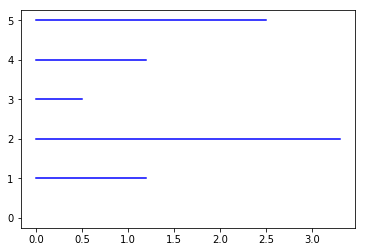

NameError: name 'plt' is not defined

In [26]:
import dionysus as d
import numpy as np 
from scipy.spatial.distance import pdist ,squareform
W=np.array([[0.0,1.2,4.5,5.0,1.2,3.7],
          [1.2,0.0,5.3,5.8,2.0,4.5],
          [4.5,5.3,0.0,.5,3.3,5.8],
            [5,5.8,.5,0.0,3.8,6.3],
            [1.2,2,3.3,3.8,0,2.5],
            [3.7,4.5,5.8,6.3,2.5,0]
           
           ])
sq_dist = squareform(W)
f = d.fill_rips(sq_dist, 2, np.max(W)) # creates the k-skeleton of the Vietoris-Rips filtration (edge weight filtration) of the graph
m = d.homology_persistence(f) # calculates persistent homology
dgms = d.init_diagrams(m, f)
for i, dgm in enumerate(dgms):
        print("Dimension:", i)
        for p in dgm:
            print(p)
d.plot.plot_bars(dgms[0],order = 'birth', show = True)
plt.show()